# Homework #3

## Question #1

For this question you will use [Olivetti Face Dataset](https://scikit-learn.org/0.19/datasets/olivetti_faces.html).

### Part 1

1. Split your dataset as train and test subset. But make sure that each test set contains exactly one random image from each distinct individual. This means, you will have to write your own train_test_split function for this dataset.

2. Construct an SVM model on your train set, and test its accuracy on your test set. For this part, the images viewed as integer vectors of length 4096 are independent variables while the id number of the person that picture belongs to is the dependent variable. In other words, you are trying to construct an SVM model that recognizes individuals based on their pictures.

3. Repeat Step 2 ten times.

4. Calculate the mean accuracy and get 95% confidence interval using the t-test.

### Part 2

Do the same things you did in Part 1 but with a multinomial regression model.

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import stats
import numpy as np

faces = fetch_olivetti_faces()
score1 = np.zeros(10)
score2 = np.zeros(10)

### Part 1

#### Uses [stratify](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) feature creates equal number of training and test images for each label. Thus, there will be 7 training images and 3 test images for each subject.

In [27]:
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size = 0.3, stratify = faces.target)
    model1 = SVC()
    model1.fit(x_train, y_train)
    prediction1 = model1.predict(x_test)
    score1[i] = accuracy_score(prediction1, y_test)
    print('Accuracy for the {}. step is {}'.format(i, score1[i]))

Accuracy for the 0. step is 0.9
Accuracy for the 1. step is 0.9333333333333333
Accuracy for the 2. step is 0.8833333333333333
Accuracy for the 3. step is 0.9083333333333333
Accuracy for the 4. step is 0.9166666666666666
Accuracy for the 5. step is 0.9166666666666666
Accuracy for the 6. step is 0.9166666666666666
Accuracy for the 7. step is 0.9333333333333333
Accuracy for the 8. step is 0.9333333333333333
Accuracy for the 9. step is 0.9166666666666666


In [28]:
confidence_level1 = 0.95
degrees_freedom1 = score1.size - 1
sample_mean1 = np.mean(score1)
sample_standard_error1 = stats.sem(score1)
confidence_interval1 = stats.t.interval(confidence_level1, degrees_freedom1, sample_mean1, sample_standard_error1)
print('Lower bound is {} and upper bound is {}'.format(confidence_interval1[0],confidence_interval1[1]))

Lower bound is 0.9044356070719635 and upper bound is 0.9272310595947031


### Part 2

In [29]:
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size = 0.3, stratify = faces.target)
    model2 = LogisticRegression(multi_class = 'multinomial', max_iter = 100, solver = 'saga')
    model2.fit(x_train, y_train)
    prediction2 = model2.predict(x_test)
    score2[i] = accuracy_score(prediction2, y_test)
    print('Accuracy for the {}. step is {}'.format(i, score2[i]))

/home/mlhsntrk/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy for the 0. step is 0.9416666666666667


/home/mlhsntrk/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy for the 1. step is 0.975


/home/mlhsntrk/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy for the 2. step is 0.9333333333333333


/home/mlhsntrk/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy for the 3. step is 0.9333333333333333


/home/mlhsntrk/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy for the 4. step is 0.9416666666666667


/home/mlhsntrk/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy for the 5. step is 0.95


/home/mlhsntrk/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy for the 6. step is 0.95


/home/mlhsntrk/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy for the 7. step is 0.9166666666666666


/home/mlhsntrk/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy for the 8. step is 0.9833333333333333
Accuracy for the 9. step is 0.975


/home/mlhsntrk/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [30]:
confidence_level2 = 0.95
degrees_freedom2 = score2.size - 1
sample_mean2 = np.mean(score2)
sample_standard_error2 = stats.sem(score2)
confidence_interval2 = stats.t.interval(confidence_level2, degrees_freedom2, sample_mean2, sample_standard_error2)
print('Lower bound is {} and upper bound is {}'.format(confidence_interval2[0],confidence_interval2[1]))

Lower bound is 0.9346079700925066 and upper bound is 0.9653920299074931


## Question #2

For this question you will use [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

### Part 1

Convert the dataset into numerical data using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) from SciKitLearn's `sklearn.feature_extraction.text` module. Make sure that you also record whether a given movie review is positive or negative or neutral. Calling on `CountVectorizer` on individual entries is not going to be enough. You will have to do some preliminary work. Read the documentation carefully.

### Part 2

Using the numerical data you constructed in Part 1, construct an LDA model to see if data projects into a 2D space with clear separation. Analyze your result.


### Part 3

Using the numerical data you constructed in Part 1, 

1. Split the data as train and test using SciKitLearn's `train_test_split` function.
2. Form a multiclass SVM model on the train set and test its accuracy.
3. Repeat a small number of times and get mean accuracy and its error band.

### Part 4

Repeat Part 2 using multinomial regression models instead of SVM.

### Part 5

Using the numerical data you constructed in Part 1, 

1. Construct an PCA model and look at the eigenvalues from largest to smallest. 
2. How many dimensions needed to capture 90% of the variation of the data? (Read the documentation of [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) form SciKitLearn)
3. Transform your data using the result you obtained in Step 2.
4. Construct an SVM model on the new dataset you constructed and cross-validate it.
5. Compare your result with the result you obtained in Part 2.


In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import re

### Part 1 : Data cleaning and vectorization

I opened .txt files and merged positive and negative comments on one list. Then, I removed special characters to clean the data and finally I created sparse matrix with CountVectorizer with using only 1000 features because my computing power is not enough to compute more than this number.

In [70]:
x_positive = []
x_negative = []

reviews_train = []
for line in open('movie_data/full_train.txt', 'r'):
    reviews_train.append(line.strip())
    
reviews_test = []
for line in open('movie_data/full_test.txt', 'r'):
    reviews_test.append(line.strip())

replace_no_space = re.compile("[.;:!\'?,\"()\[\]]")
replace_with_space = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [replace_no_space.sub("", line.lower()) for line in reviews]
    reviews = [replace_with_space.sub(" ", line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(reviews_train)
reviews_test_clean = preprocess_reviews(reviews_test)

cv0 = CountVectorizer(max_features = 1000)
cv1 = (cv0.fit_transform(reviews_train_clean)).toarray()
for i in range(1000):
    if i <= 500:
        x_positive.append(cv1[i])
    else:
        x_negative.append(cv1[i])

Target can be found by the data explanation because it is known that there is 25K comment for the train set and half of them is positive and the other part is negative. I used 1000 samples that has equal number of positive and negative comments.
I did not use the unsupported comments for this question.

In [71]:
x = x_positive + x_negative
target = np.array([1 if i < 500 else 0 for i in range(1000)])

### Part 2 : Linear discriminant analysis model

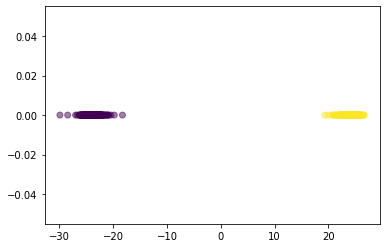

In [72]:
model2 = LinearDiscriminantAnalysis()
model2.fit(x, target)
transformed = model2.fit_transform(x, target)
plt.scatter(transformed[:,0],np.zeros(len(transformed)), c = target, alpha = 0.5)

It can be seen that the dataset is clearly seperable.

### Part 3 : Multiclass SVM model

In [73]:
score3 = np.zeros(5)

for i in range(5):
    x_train, x_val, y_train, y_val = train_test_split(x, target, train_size = 0.75)
    model3 = SVC(kernel = 'linear', C = 0.01)
    model3.fit(x_train, y_train)
    score3[i] = accuracy_score(y_val, model3.predict(x_val))
    print('Accuracy for the {}. step is {}'.format(i, score3[i]))

Accuracy for the 0. step is 0.64
Accuracy for the 1. step is 0.624
Accuracy for the 2. step is 0.656
Accuracy for the 3. step is 0.644
Accuracy for the 4. step is 0.66


In [74]:
print(' ')
print('Mean accuracy is {}'.format(np.mean(score3)))

 
Mean accuracy is 0.6448


### Part 4 : Multinomial regression model

In [75]:
score4 = np.zeros(5)

for i in range(5):
    x_train, x_val, y_train, y_val = train_test_split(x, target, train_size = 0.75)
    model4 = LogisticRegression(multi_class = 'multinomial', max_iter = 2000, C = 0.05, solver='saga')
    model4.fit(x_train, y_train)
    score4[i] = accuracy_score(y_val, model4.predict(x_val))
    print('Accuracy for the {}. step is {}'.format(i, score4[i]))

Accuracy for the 0. step is 0.648
Accuracy for the 1. step is 0.668
Accuracy for the 2. step is 0.624
Accuracy for the 3. step is 0.632
Accuracy for the 4. step is 0.644


In [77]:
print(' ')
print('Mean accuracy is {}'.format(np.mean(score4)))

 
Mean accuracy is 0.6432


### Part 5 : PCA model

Part 5/1 : Eigenvalues from largest to smallest

In [78]:
model5 = PCA()
model5.fit(x)
comp_var = model5.explained_variance_
print(model5.explained_variance_)

[2.93924359e+02 2.05553605e+01 1.18638767e+01 1.04971267e+01
 8.88516644e+00 8.26316833e+00 6.34367031e+00 5.20993127e+00
 4.99948921e+00 4.34303257e+00 4.03706142e+00 3.73076162e+00
 3.54396835e+00 2.97134049e+00 2.79229277e+00 2.72465360e+00
 2.44115378e+00 2.37968708e+00 2.31177943e+00 2.07735731e+00
 1.98413637e+00 1.89232198e+00 1.76245037e+00 1.66859901e+00
 1.65419260e+00 1.58424096e+00 1.52291871e+00 1.47246262e+00
 1.44707227e+00 1.42033794e+00 1.38389344e+00 1.34204535e+00
 1.27939978e+00 1.24292846e+00 1.23039148e+00 1.20913982e+00
 1.18914767e+00 1.13750381e+00 1.09343051e+00 1.07150292e+00
 1.04292840e+00 1.03622665e+00 1.02514278e+00 9.90308580e-01
 9.76463367e-01 9.52159735e-01 9.08988189e-01 9.08043201e-01
 8.89794465e-01 8.62114926e-01 8.32274574e-01 8.14354375e-01
 8.09585999e-01 7.97952886e-01 7.86218979e-01 7.69083565e-01
 7.65675700e-01 7.46553790e-01 7.42929161e-01 7.25116981e-01
 7.19713425e-01 7.05110928e-01 6.90059590e-01 6.81779791e-01
 6.67382265e-01 6.637438

Part 5/2 : Calculates how many dimensions needed to capture 90% of the variation of the data

You need 103 features to express 90% of the variance


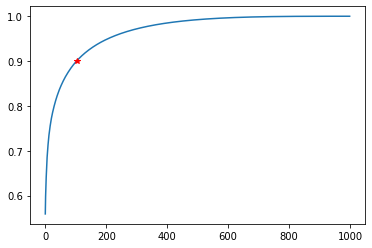

In [79]:
comp_var = comp_var/comp_var.sum()
explained_var = np.cumsum(comp_var)
inf90_idx = np.where(explained_var > 0.9)[0][0]
plt.figure()
plt.plot(np.arange(len(explained_var)), explained_var)
plt.plot(inf90_idx, explained_var[inf90_idx], 'r*')
print("You need {} features to express 90% of the variance".format(inf90_idx))

Part 5/3 : Transforming the data

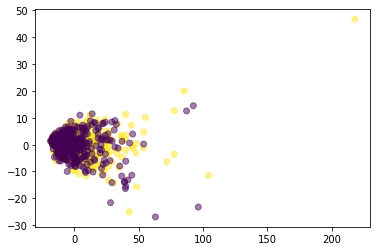

In [80]:
cloud = model5.fit_transform(x)
plt.scatter(cloud[:,0],cloud[:,1],c = target, alpha = 0.5)

Part 5/4: Cross validation with the SVM model

In [81]:
temp_score = []
score5 = []

for i in range(5):
    model5 = PCA(inf90_idx)
    model5.fit(x)
    transformation = model5.fit_transform(x)
    model6 = SVC(kernel = 'linear', C = 0.01)
    temp_score = cross_val_score(model6, transformation, target, cv = 5)
    score5.append(np.mean(temp_score))

av_acc = sum(score5) / len(score5)
print('Average accuracy is {}'.format(av_acc))

Average accuracy is 0.5408


Part 5/5: Comparing the result with Part 2

LDA model obviously works better then PCA model beacuse if you look at the LDA plot you can see clearly separable data structure. Maybe PCA model does not works well because I decreased the sample size a considerable amount.